# Analyzing ATP Matches - The top tier of annual men's tennis is the ATP Tour.

The different tournament tiers are represented by single letters:

* 'G' = Grand Slams
* 'M' = Masters 100s
* 'A' = other tour-level events
* 'C' = Challengers
* 'S' = Satellites/ITFs
* 'F' = Tour finals and other season-ending events
* 'D' = Davis Cup



In [0]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## ATP Grand Slam Matches

In [0]:
# list all atp_matches dfs from 1983 to 2019
matches_url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{}.csv"
list_of_matches_urls = [matches_url.format(year) for year in range(1983,2020)]
dfs_matches = [pd.read_csv(url) for url in list_of_matches_urls]
# concat all atp_matches from dfs 1983 to 2019
df_matches = pd.concat(dfs_matches, axis=0, sort=False, join='outer')
print(df_matches.shape)
df_matches.sample(5)

(120750, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
1304,1985-520,Roland Garros,Clay,NaN,G,19850527,73,101062,4.0,NaN,Mats Wilander,R,183.0,SWE,20.76,101414,NaN,NaN,Boris Becker,R,190.0,GER,17.51,6-3 6-2 6-1,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,30.0,NaN
2252,1994-540,Wimbledon,Grass,NaN,G,19940620,123,101964,4.0,NaN,Goran Ivanisevic,L,193.0,CRO,22.77,101098,NaN,NaN,Guy Forget,L,190.0,FRA,29.46,7-6(3) 7-6(3) 6-4,5,QF,7.0,29.0,9.0,147.0,84.0,80.0,29.0,17.0,3.0,4.0,19.0,2.0,126.0,89.0,75.0,15.0,17.0,5.0,7.0,5.0,2684.0,NaN,NaN
1231,1988-308,Munich,Clay,NaN,A,19880502,10,101120,NaN,NaN,Karel Novacek,R,190.0,CZE,23.09,101284,NaN,Q,Lars Anders Wahlgren,R,193.0,SWE,21.69,7-5 6-3,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,307.0,NaN
1757,2012-540,Wimbledon,Grass,NaN,G,20120625,4,103285,28.0,NaN,Radek Stepanek,R,185.0,CZE,33.58,104660,NaN,NaN,Sergiy Stakhovsky,R,193.0,UKR,26.47,6-1 1-0 RET,5,R128,37.0,1.0,0.0,20.0,12.0,10.0,6.0,4.0,0.0,0.0,0.0,0.0,28.0,18.0,5.0,5.0,4.0,0.0,3.0,27.0,1340.0,85.0,603.0
3255,1983-703,Ferrara,Carpet,NaN,A,19831114,25,100380,NaN,NaN,Butch Walts,R,193.0,USA,28.45,100354,NaN,NaN,Bernard Mitton,R,188.0,RSA,29.01,7-6 6-3,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473.0,NaN,162.0,NaN


In [0]:
# only grand slams matches
atp_g = df_matches[df_matches['tourney_level']=='G']
print(atp_g.shape)
atp_g.sample(5)

(18159, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2176,1995-540,Wimbledon,Grass,NaN,G,19950626,116,101611,NaN,NaN,Cedric Pioline,R,188.0,FRA,26.03,101434,NaN,NaN,Petr Korda,L,190.0,CZE,27.42,7-6(1) 6-3 6-2,5,R16,122.0,7.0,9.0,128.0,72.0,55.0,24.0,15.0,8.0,10.0,1.0,9.0,112.0,55.0,36.0,21.0,14.0,4.0,9.0,58.0,719.0,56.0,719.0
1202,1984-540,Wimbledon,Grass,NaN,G,19840625,177,100797,NaN,NaN,Ben Testerman,L,185.0,USA,22.39,100377,NaN,NaN,Colin Dowdeswell,R,185.0,GBR,29.12,6-4 6-3 6-3,5,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,59.0,NaN
1534,2005-520,Roland Garros,Clay,NaN,G,20050523,82,103781,NaN,NaN,Jurgen Melzer,L,183.0,AUT,24.00,104022,29.0,NaN,Mikhail Youzhny,R,183.0,RUS,22.91,6-3 6-4 7-6(5),5,R64,134.0,2.0,1.0,101.0,62.0,41.0,27.0,16.0,2.0,4.0,4.0,2.0,110.0,59.0,36.0,28.0,15.0,11.0,15.0,44.0,855.0,30.0,1095.0
1534,2003-520,Roland Garros,Clay,NaN,G,20030526,59,103581,NaN,NaN,Flavio Saretta,R,183.0,BRA,22.91,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,24.76,7-6(4) 6-0 6-0,5,R128,102.0,5.0,3.0,70.0,42.0,30.0,18.0,12.0,1.0,2.0,1.0,7.0,86.0,53.0,23.0,14.0,12.0,12.0,19.0,78.0,546.0,60.0,665.0
304,1994-580,Australian Open,Hard,NaN,G,19940117,119,101774,9.0,NaN,Todd Martin,R,198.0,USA,23.53,101552,NaN,NaN,Xavier Daufresne,R,193.0,BEL,25.07,6-7(3) 7-6(5) 6-3 6-3,5,R16,33.0,14.0,7.0,179.0,106.0,74.0,37.0,21.0,9.0,12.0,10.0,4.0,172.0,107.0,77.0,26.0,21.0,21.0,27.0,12.0,1751.0,125.0,339.0


In [0]:
# set year for dataframe
atp_g['t_year'] = atp_g.tourney_date//10000
# convert integer date to proper date format
atp_g['t_date'] = atp_g['tourney_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
print(atp_g.shape)
atp_g.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(18159, 51)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,t_year,t_date
175,2009-580,Australian Open,Hard,NaN,G,20090119,29,104534,NaN,Q,Dudi Sela,R,175.0,ISR,23.79,102783,30.0,NaN,Rainer Schuettler,R,180.0,GER,32.74,1-6 6-2 6-4 6-4,5,R128,163.0,2.0,3.0,107.0,77.0,53.0,12.0,17.0,5.0,10.0,2.0,3.0,127.0,100.0,57.0,11.0,18.0,12.0,19.0,106.0,908.0,31.0,1924.0,2009,2009-01-19
2087,1995-540,Wimbledon,Grass,NaN,G,19950626,27,101133,NaN,Q,Patrick Baur,R,188.0,GER,30.15,101398,NaN,Q,Neil Borwick,L,193.0,AUS,27.78,6-2 6-4 6-1,5,R128,90.0,5.0,3.0,84.0,52.0,42.0,19.0,13.0,2.0,2.0,4.0,3.0,86.0,61.0,34.0,10.0,12.0,4.0,9.0,150.0,282.0,219.0,172.0,1995,1995-06-26
1863,2007-540,Wimbledon,Grass,NaN,G,20070625,106,104571,10.0,NaN,Marcos Baghdatis,R,183.0,CYP,22.02,103900,23.0,NaN,David Nalbandian,R,180.0,ARG,25.48,6-2 7-5 6-0,5,R32,101.0,5.0,0.0,76.0,37.0,33.0,25.0,13.0,1.0,1.0,3.0,7.0,86.0,45.0,27.0,16.0,13.0,4.0,10.0,16.0,1570.0,25.0,1115.0,2007,2007-06-25
1828,1994-520,Roland Garros,Clay,NaN,G,19940523,36,102374,NaN,NaN,Alex Corretja,R,180.0,ESP,20.11,101897,NaN,NaN,Fernando Meligeni,L,180.0,BRA,23.11,6-3 6-1 1-6 5-7 6-3,5,R128,27.0,8.0,5.0,155.0,83.0,59.0,29.0,22.0,7.0,14.0,3.0,3.0,153.0,89.0,53.0,27.0,22.0,12.0,21.0,41.0,835.0,81.0,518.0,1994,1994-05-23
211,2012-580,Australian Open,Hard,NaN,G,20120116,69,104386,9.0,NaN,Janko Tipsarevic,R,180.0,SRB,27.57,105902,NaN,WC,James Duckworth,R,183.0,AUS,19.99,3-6 6-2 7-6(5) 6-4,5,R64,191.0,11.0,3.0,105.0,62.0,49.0,26.0,19.0,2.0,5.0,9.0,6.0,145.0,99.0,65.0,20.0,20.0,11.0,15.0,9.0,2655.0,250.0,191.0,2012,2012-01-16


In [0]:
# only quarter finalists
atp_g_qf = atp_g[atp_g['round']=='QF']
print(atp_g_qf.shape)
atp_g_qf.sample(5)

(576, 51)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,t_year,t_date
1528,2009-520,Roland Garros,Clay,NaN,G,20090525,124,103819,2.0,NaN,Roger Federer,R,185.0,SUI,27.79,104792,11.0,NaN,Gael Monfils,R,193.0,FRA,22.73,7-6(6) 6-2 6-4,5,QF,130.0,8.0,1.0,94.0,54.0,43.0,26.0,15.0,4.0,4.0,7.0,1.0,105.0,61.0,41.0,22.0,15.0,2.0,5.0,2.0,10470.0,10.0,3150.0,2009,2009-05-25
1914,2000-540,Wimbledon,Grass,NaN,G,20000626,121,101948,1.0,NaN,Pete Sampras,R,185.0,USA,28.87,102998,NaN,NaN,Jan Michael Gambill,R,190.0,USA,23.06,6-4 6-7(4) 6-4 6-4,5,QF,166.0,22.0,7.0,132.0,93.0,74.0,20.0,21.0,3.0,3.0,22.0,2.0,135.0,82.0,59.0,32.0,21.0,8.0,11.0,3.0,3261.0,56.0,707.0,2000,2000-06-26
269,2011-580,Australian Open,Hard,NaN,G,20110117,123,104925,3.0,NaN,Novak Djokovic,R,188.0,SRB,23.66,104607,6.0,NaN,Tomas Berdych,R,196.0,CZE,25.33,6-1 7-6(5) 6-1,5,QF,152.0,10.0,1.0,91.0,62.0,51.0,12.0,14.0,1.0,2.0,6.0,5.0,96.0,52.0,37.0,15.0,12.0,5.0,10.0,3.0,6240.0,6.0,3955.0,2011,2011-01-17
1763,2016-540,Wimbledon,Grass,NaN,G,20160627,222,104607,10.0,NaN,Tomas Berdych,R,196.0,CZE,30.78,106298,32.0,NaN,Lucas Pouille,R,185.0,FRA,22.34,7-6(4) 6-3 6-2,5,QF,114.0,10.0,3.0,87.0,52.0,45.0,18.0,15.0,3.0,4.0,9.0,8.0,107.0,62.0,44.0,15.0,14.0,4.0,8.0,9.0,2950.0,30.0,1311.0,2016,2016-06-27
2101,1991-540,Wimbledon,Grass,NaN,G,19910624,121,101222,1.0,NaN,Stefan Edberg,R,188.0,SWE,25.43,101285,NaN,NaN,Thierry Champion,R,183.0,FRA,24.81,6-3 6-2 7-5,5,QF,102.0,6.0,2.0,78.0,46.0,39.0,19.0,15.0,0.0,1.0,6.0,0.0,89.0,60.0,36.0,15.0,14.0,2.0,7.0,1.0,3818.0,90.0,406.0,1991,1991-06-24


In [0]:
# only finalists
atp_g_f = atp_g[atp_g['round']=='F']

# only matches Roger Federer as winner
df_rf = atp_g_f[(atp_g_f['winner_name']=='Roger Federer')]
# only matches Rafael Nadal as winner
df_rn = atp_g_f[(atp_g_f['winner_name']=='Rafael Nadal')]
# only matches Novak Djokovic as winner
df_nd = atp_g_f[(atp_g_f['winner_name']=='Novak Djokovic')]

In [0]:
# create average age of grand slam quarterfinalists
age_data = []
for year in range(1983,2019):
  df_year = atp_g_qf[atp_g_qf['t_year']==year]
  age_mean_w = df_year.winner_age.mean()
  age_mean_l = df_year.loser_age.mean()
  age_mean = (age_mean_l+age_mean_w)/2
  age_data.append([df_year.iloc[-1]['t_date'], age_mean])
  
# create dataframe for average quarterfinalists' age
atp_age_qf = pd.DataFrame(age_data,columns=['date','age_mean'])
atp_age_qf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
date,1983-11-29 00:00:00,1984-11-26 00:00:00,1985-11-25 00:00:00,1986-08-26 00:00:00,1987-09-01 00:00:00,1988-08-29 00:00:00,1989-08-28 00:00:00,1990-08-27 00:00:00,1991-08-26 00:00:00,1992-08-31 00:00:00,1993-08-30 00:00:00,1994-08-29 00:00:00,1995-08-28 00:00:00,1996-08-26 00:00:00,1997-08-25 00:00:00,1998-08-31 00:00:00,1999-08-30 00:00:00,2000-08-28 00:00:00,2001-08-27 00:00:00,2002-08-26 00:00:00,2003-08-25 00:00:00,2004-08-30 00:00:00,2005-08-29 00:00:00,2006-08-28 00:00:00,2007-08-27 00:00:00,2008-08-25 00:00:00,2009-08-31 00:00:00,2010-08-30 00:00:00,2011-08-29 00:00:00,2012-08-27 00:00:00,2013-08-26 00:00:00,2014-08-25 00:00:00,2015-08-31 00:00:00,2016-08-29 00:00:00,2017-08-28 00:00:00,2018-08-27 00:00:00
age_mean,24.8762,24.0475,24.9478,23.6658,25.3234,23.9541,24.7928,24.2172,24.2716,24.1988,24.2,24.3209,24.5172,25.4588,24.5091,25.2116,26.1069,25.3569,25.3847,25.8447,25.6944,25.2322,24.9469,24.8866,24.9512,24.5988,25.2119,25.5041,26.0456,26.9462,28.4041,27.4041,28.8656,28.7959,29.4153,29.3072


## Graph - Visualization

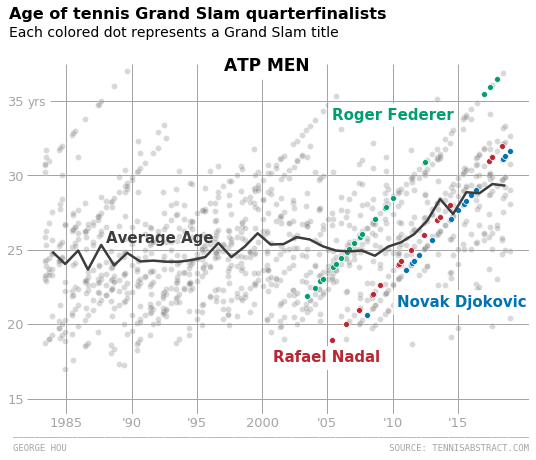

In [0]:
fig, ax = plt.subplots(figsize=(8.015,6))
# set plot style
plt.style.use('fivethirtyeight')

# Adding the scout changes the xaxis relative to when we don't add the scout
scout = ax.scatter([], [])
scout.remove()

# despine outer frame
sns.despine(left=True, bottom=True)

# set background to white
plt.rcParams['figure.facecolor'] = 'white'
plt.grid(color='#A5A5A5')
ax.set(yticks=range(0, 40, 5), facecolor='white')

axw = sns.scatterplot(x="t_date", y="winner_age", alpha=.3,
                      data=atp_g_qf,color='grey')
axl = sns.scatterplot(x="t_date", y="loser_age", alpha=.3,
                      data=atp_g_qf,color='grey')
axw1 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_nd,color='#0173B2')
axw2 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_rn,color='#B92732')
axw3 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_rf,color='#029E73')

# average age mean line 34495E
ax.plot(atp_age_qf.date, atp_age_qf['age_mean'], color='#3C3C3C', lw=2.5)

# set x and y label
ax.set_xlabel('', fontsize=20, color='#A5A5A5')
ax.set_ylabel('', fontsize=20, color='#A5A5A5')

# modify y labels
ax.set_yticks([15, 20,25,30,35])
ax.set_yticklabels(labels=['15','20','25','30','35'], 
                   fontsize=13, color='#A5A5A5')

# modify x labels
ax.set_xticks([pd.to_datetime('1985-1-1'), pd.to_datetime('1990-1-1'), 
               pd.to_datetime('1995-1-1'), pd.to_datetime('2000-1-1'), 
               pd.to_datetime('2005-1-1'), pd.to_datetime('2010-1-1'), 
               pd.to_datetime('2015-1-1')])
ax.set_xticklabels(labels=["1985","'90","'95","2000","'05","'10","'15"], 
                   fontsize=13, color='#A5A5A5')

# set x and y limits
# ax.set_xlim([dt.date(1982, 6, 25), dt.date(2019, 2, 1)])
ax.set_xlim([pd.to_datetime('1982-1-1'), pd.to_datetime('2020-6-30')])
ax.set_ylim([14, 37.5])

# Text for Title Three Kings of Tennis still going strong
ax.text(x=pd.to_datetime('1980-8-1'), y=40.5, s="Age of tennis Grand Slam quarterfinalists", 
        fontsize=16, fontweight='bold');

# Text for Subtitle
ax.text(x=pd.to_datetime('1980-8-1'), y=39.3, s="Each colored dot represents a Grand Slam title", 
        fontsize=14);
# ax.text(x=pd.to_datetime('1980-8-1'), y=38.2, s="1983-2018", 
#         fontsize=14);

# text for yrs next to 40
ax.text(x=pd.to_datetime('1982-1-1'), y=34.65, s="yrs", fontsize=12, 
        color='#A5A5A5',backgroundcolor = 'white')

# text for Roger Federer
ax.text(x=pd.to_datetime('2005-5-1'), y=33.763, s="Roger Federer", fontsize=15, 
        color='#029E73', fontweight='semibold',backgroundcolor = 'white')

# text for Rafael Nadal
ax.text(x=pd.to_datetime('2000-10-25'), y=17.45, s="Rafael Nadal", fontsize=15, 
        color='#B92732', fontweight='semibold',backgroundcolor = 'white')

# text for Novak Djokovic
ax.text(x=pd.to_datetime('2010-5-20'), y=21.189, s="Novak Djokovic", fontsize=15, 
        color='#0173B2', fontweight='semibold',backgroundcolor = 'white')

# text for average age
ax.text(x=pd.to_datetime('1988-1-1'), y=25.5, s="Average Age", fontsize=15, 
        color='#3C3C3C', fontweight='semibold')

# text for Men
ax.text(x=pd.to_datetime('1997-2-1'), y=37, s="ATP MEN", fontsize=17, 
        color='black', fontweight='bold',backgroundcolor = 'white')

# signature line at bottom
ax.text(x =pd.to_datetime('1980-11-20'), y = 12.5,
    s = '________________________________________________________________________________________________',
    fontsize = 9, family='monospace', color = '#A5A5A5')
ax.text(x =pd.to_datetime('1980-11-20'), y = 11.5,
    s = 'GEORGE HOU                                                            SOURCE: TENNISABSTRACT.COM',
    fontsize = 9, family='monospace', color = '#A5A5A5');